# Домашнее задание 6 (17 pts)

## Задача 1 (5 pts)

Получите аналитические выражения для проекций на множества

1) (2 pts) Лоренцев конус $\{ (x, t) \in \mathbb{R}^n \times \mathbb{R}_+ \mid \|x\|_2 \leq t\}$

2) (3 pts) множество симметричных положительно полуопределённых матриц, при условии, что проецируемая матрица симметрична


Оцените сложность вычисления проекций для каждого множества.

1)Задача поиска проекции сводится к следующей выпуклой задаче:
$$\|x-y\|_2^2 + (t_x - t_y)^2 \to min\ s.t.\ \|x\|_2^2 \leq t_x^2$$
Лагранжиан:$L(x, t_x, \mu) = \|x-y\|_2^2 + (t_x - t_y)^2 + \mu(\|x\|_2^2 - t_x^2)$
$$\nabla_x L = 2(x - y) + 2\mu x = 0$$
$$\nabla_{t_x} L = 2(t_x - t_y) - 2\mu t_x = 0$$
$$\mu \geq 0$$
$$\mu(\|x\|_2^2 - t_x^2)=0$$
Так что $x = \frac{y}{1+\mu}$ и $t_x = \frac{t_y}{1-\mu}$. Остается решить уравнение:
$$\mu(\|x\|_2^2 - t_x^2) = \mu(\frac{\|y\|_2^2}{(1+\mu)^2} - \frac{t_y^2}{(1-\mu)^2})=0$$
$$\mu(\frac{\|y\|_2}{1+\mu} - \frac{|t_y|}{|1-\mu|})(\frac{\|y\|_2}{1+\mu} + \frac{|t_y|}{|1-\mu|})=0$$
Мю не равно нулю, так как иначе получится, что $t_y = 0$, что не равно в общем случае. Если $t_y = 0$, то $x = y/2$ и $t_x = \|y\|_2/2$.
Так как мю неотрицательно, то $\mu + 1 > |\mu - 1|$. Разберем $\frac{\|y\|_2}{1+\mu} - \frac{|t_y|}{|1-\mu|}$. Если $t_y < 0$, то $\frac{\|y\|_2}{1+\mu} + \frac{t_y}{|1-\mu|}$ неотрицательно. Иначе $\frac{\|y\|_2}{1+\mu} - \frac{t_y}{|1-\mu|} = 0 \to \mu=\frac{\|y\|_2-t_y}{\|y\|_2+t_y}$, в случае если $\|y\|_2>t_y$, иначе вектор уже лежит в конусе. Если рассмотрим вторую скобку $\frac{\|y\|_2}{1+\mu} + \frac{|t_y|}{|1-\mu|}$, то тут аналогично. Если $t_y > 0$, то выражение неотрицательно, иначе $\mu=\frac{\|y\|_2-t_y}{\|y\|_2+t_y}$ при условии, что $\|y\|_2>-t_y$.\
Таким образом: $$x = y/(1+\frac{\|y\|_2-t_y}{\|y\|_2+t_y}) \to x=\frac{\|y\|_2+t_y}{2\|y\|_2}y$$
$$t_x = t_y/(1-\frac{\|y\|_2-t_y}{\|y\|_2+t_y})\to t_x = \frac{\|y\|_2+t_y}{2} =  \frac{\|y\|_2+t_y}{2\|y\|_2}\|y\|_2$$
Как видно, условия выполняются даже если t_y = 0. Если для вектора y уже выполняется $\|y\|_2 \leq t_y$, то проекцией на множество является сам же вектор.

Что касается сложности вычисления проекции, то нам надо вычислить $\|y\|_2$, что делается за $O(n)$ операций умножения и сложения, ну и одно взятие корня. Затем сложить полученное выражение с t_y и поделить на $2\|y\|_2$. После, надо умножить финальное число на каждый компонент вектора y, что займет $O(n)$ операций. Итого сложность $O(n)$.

2) Сведем задачу к выпуклой:$$\|Y-X\|_2 \to \min s.t. Y \succeq 0$$
Так как матрица X положительно полуопределенная и симметричная, то у нее не должно быть отрицательно определенных собственных значений. Поэтому проекцией любой симетричной матрицы на множество полуопределенных является матрица, которая получается из обнуления отрицательных диагональных элементов исходной матрицы в разложении по собственным значениям(eigenvalue decomposition). Докажем это.\
У симметричных матриц в сингулярном разложении в диагональной матрице находятся модули собственных значений по убыванию. Поэтому получается:
$$\|Y-X\|_2 = \sup\limits_{\|v\|_2=1} v^T(Y-X)v$$
$$\|X\|_2 = \max(\lambda_1, \lambda_n) = \max(v_1^TXv_1, -v_n^TXv_n) = \max(\sup\limits_{\|v\|_2=1} v^TXv, -\inf\limits_{\|v\|_2=1} vXv)$$
Отсюда:$$\sup\limits_{\|v\|_2=1} v^T(Y-X)v \geq v_n^T(Y-X)v_n = v_n^TYv_n - v_n^TXv_n \geq -\lambda_n$$
В последнем неравенстве использовалось свойство $\forall x\neq 0: x^TYx \geq 0$ для положительно полуопределенной матрицы. Чтобы достичь этой нижней грани, возьмем матрицу $X = \sum_i^n max(\lambda_i, 0)v_i^Tv_i$. Она как раз и дает нижнюю оценку.

Чтобы найти разложение матрицы по собственным значениям, нужно $O(n^3)$ операций(приводим например к диагональному виду с помощью метода гаусса). Поэтому сложность $O(n^3)$

## Задача 2 (12 pts)

__1.__ Скачайте с помощью кода, приведённого ниже, набор фотографий и нарисуйте какую-нибудь из них.

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/bogdan/scikit_learn_data
Shape of data = (400, 64, 64)


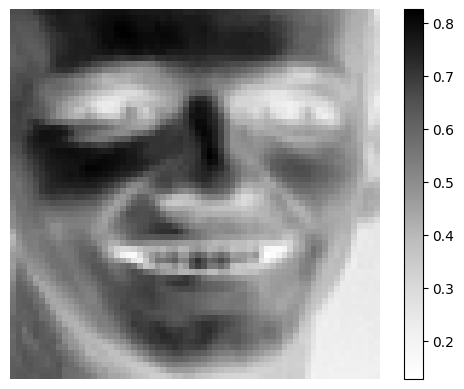

In [1]:
import sklearn.datasets as skldata
import matplotlib.pyplot as plt
import sklearn.decomposition as skdec
%matplotlib inline
data = skldata.fetch_olivetti_faces()
import numpy as np
print("Shape of data = {}".format(data["images"].shape))
index = 42
plt.imshow(data["images"][index], cmap=plt.cm.Greys)
plt.colorbar()
_ = plt.axis("off")

__2.__ Одним из способов обработки изображений, например для выделения наиболее важных сегментов используется метод неотрицательной матричной факторизации ([Nonnegative matrix factorization](https://arxiv.org/pdf/1401.5226.pdf)). 
Идея в том, чтобы решить следующую задачу

\begin{align*}
& \min_{W, H} \frac12 \|X - WH\|^2_F \\
\text{s.t. } & W \geq 0\\
& H \geq 0,
\end{align*}

где знак $\geq$ означает покомпонентное сравнение. 
Также матрицы $W$ и $H$ малого ранга, то есть $W \in \mathbb{R}^{m \times k}$ и $H \in \mathbb{R}^{k \times n}$, где $k$ - параметр, который необходимо настраивать.
Чем больше $k$, тем точнее приближение, но и тем дольше будет решаться задача.
Матрица $X \in \mathbb{R}^{m \times n}$, где $m$ - это число фото в нашем наборе, а $n$ - это количество пикселей в каждой картинке, то есть каждая строка матрицы $X$ - это векторизованная картинка.

**Вопросы**

1) (1 pts) является ли эта задача выпуклой и почему?

Нет, задача не является выпуклой, так как минимизируемая функция не выпукла. Это следует из того, что у выпуклой задачи глобальный минимум, а у данной может быть несколько(достаточно изменить немного элементы матриц W и H).

2) (1 pts) как можно интерпретировать факторы $W$ и $H$ и почему важна их покомпонентная неотрицательность?

Факторы W и H можно интерпретировать как какие-нибудь фичи картинки. Например W может отображать какие-то части изображения, или фичи, такие как количество кругов, квадратов, в общем каких-то контуров, а матрица H - матрица важности этих признаков. В статье используется пример для фото, что W - матрица признаков изображения лица, а H -матрица важности.

__3.__ Такую задачу можно решить если воспользоваться идеей попеременной оптимизации (alternating optimization). Идея состоит в том, чтобы на чётных итерациях обновлять параметр $W$ при фиксированном параметре $H$, а на нечётных наоборот: использовать решение для $W$ с предыдущей итерации в качестве фиксированного параметра и обновиться параметр $H$ и так далее до сходимости.
Сначала Вам нужно инициализировать матрицы $W$ и $H$ какими-нибудь матрицами с неотрицательными элементами. От инициализации может сильно зависеть качество решения и скорость работы методов.

**Задачи**

1) (2 pts) реализуйте проксимальный градиентный метод и его ускоренную версию для обновления параметров задачи

2) (4 pts) предложите несколько (> 2) эвристик как именно можно применять реализованные методы для решения поставленной задачи. Постарайтесь предложить максимально эффективные вараинты.

Можно обнулять положительные градиенты, чтобы $-grad$ был неотрицательным, поэтому матрицы не выйдут из диапазона множества поиска.

2) (2 pts) нарисуйте график сходимости по функции для каждого из предложенных подходов и убедитесь, что методы сошдлись или же изменение целевой функции пренебрежимо мало. Прокомментируйте результаты и определите какой из предложенных вами подходов оказался наиболее эффективным. Как вы думаете почему?

3) (1 pts) поскольку размерность $H$ - $k \times n$, то каждую строку $H$ можно преобразовать в картинку аналогично тому, как были собраны строки матрицы $X$. Нарисуйте 10-50 картинок полученных из строк матрицы $H$. Что Вы заметили и как это соотносится с ответами на вопрос 2) предыдущего пункта? Используйте ```plt.colorbar()``` и цветовую схему ```plt.cm.Greys``` для более чёткого отображения значений пикселей

4) (1 pts) Нарисуйте матрицу $W$ с помощью функции ```plt.imshow``` или ```plt.spy```. Насколько сильно она заполнена и почему?

In [ ]:
# Место для Вашего решения